# Imports & settings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def plot_generated_data(X, y):
    """
    Shows the plot of the generated data, assuming that the data is 3D at most, differencing the samples labels by color.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plots the samples with different colors for each label.
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='bwr')

    # Sample features as plot axis.
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

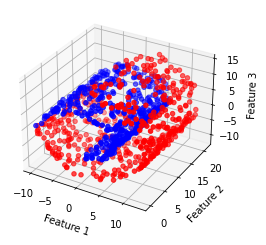

In [14]:
def generate_and_split_data(test_size, n_samples, noise, random_state):
    """
    This function generates a dataset using the Swiss roll method, and then splits it into train and test sets.
    """
    # Generates the Swiss roll dataset.
    X, t = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=random_state)

    # Calculates the threshold based on the median or mean of t, we selected mean.
    threshold = np.mean(t)

    # Assigns labels based on the threshold.
    y = np.where(t < threshold, -1, 1)

    # Plots the generated data.
    plot_generated_data(X, y)

    # Performs train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Data generation.
X_train, X_test, y_train, y_test = generate_and_split_data(test_size=0.5, n_samples=1000, noise=0.2, random_state=42)

In [15]:
def generated_data_to_AMPL(file_path, A, y, train=True):
    """
    Given a path to a new file, the A matrix (samples), and the y vector (labels), this function generates 
    the code to express these mathematical objects in AMPL format and stores them in a .dat file.
    """

    # Number of samples and features.
    m, n = A.shape  

    with open(file_path, 'w') as file:
        if train:
            file.write("param nu := 1;\n")
            file.write("param m := {};\n".format(m))
            file.write("param n := {};\n".format(n))
            file.write("\n")

            file.write("param A_train:\n")
            file.write("\t")
            file.write("\t".join("{}".format(i+1) for i in range(n)))
            file.write(" :=\n")

            for i in range(m):
                file.write("\t")
                file.write(str(i+1))
                file.write("\t")
                file.write("\t".join("{:.3f}".format(A[i][j]) for j in range(n)))
                file.write("\n")

            file.write(";\n")
            file.write("\n")

            file.write("param y_train :=")
            for i in range(m):
                file.write("\n\t{} {:.3f}".format(i + 1, y[i]))

            file.write("\n;")

        else:
            file.write("param A_test:\n")
            file.write("\t")
            file.write("\t".join("{}".format(i+1) for i in range(n)))
            file.write(" :=\n")

            for i in range(m):
                file.write("\t")
                file.write(str(i+1))
                file.write("\t")
                file.write("\t".join("{:.3f}".format(A[i][j]) for j in range(n)))
                file.write("\n")

            file.write(";\n")
            file.write("\n")

            file.write("param y_test :=")
            for i in range(m):
                file.write("\n\t{} {:.3f}".format(i + 1, y[i]))

            file.write("\n;")

# Stores in appropriate AMPL format the generated data.
generated_data_to_AMPL('train.dat', X_train, y_train, train=True)
generated_data_to_AMPL('test.dat', X_test, y_test, train=False)